In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
# from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


# VECTOR AUTO REGRESSION EQUATION:


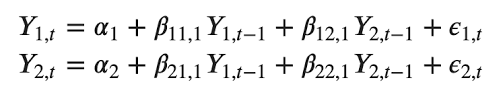

In [2]:
filepath = r"C:\Users\Admin\Downloads\Sales_Month.xlsx"
macro_data = pd.read_excel(filepath,parse_dates=['Month'],index_col='Month')
print(macro_data.shape)  # (123, 8)
macro_data.head()

(36, 4)


,Company_Quantity,Company_Sales,Competitor_Quantity,Competitor_Sales
Month,,,,
2021-01-01,281.10,26.852712,1704955,1050416.0
2021-02-01,117.30,14.840290,710321,580518.0
2021-03-01,336.60,26.309198,2448896,1029155.0
2021-04-01,152.53,8.797044,2866085,1829839.0
2021-05-01,264.16,13.172990,4962707,2740062.0


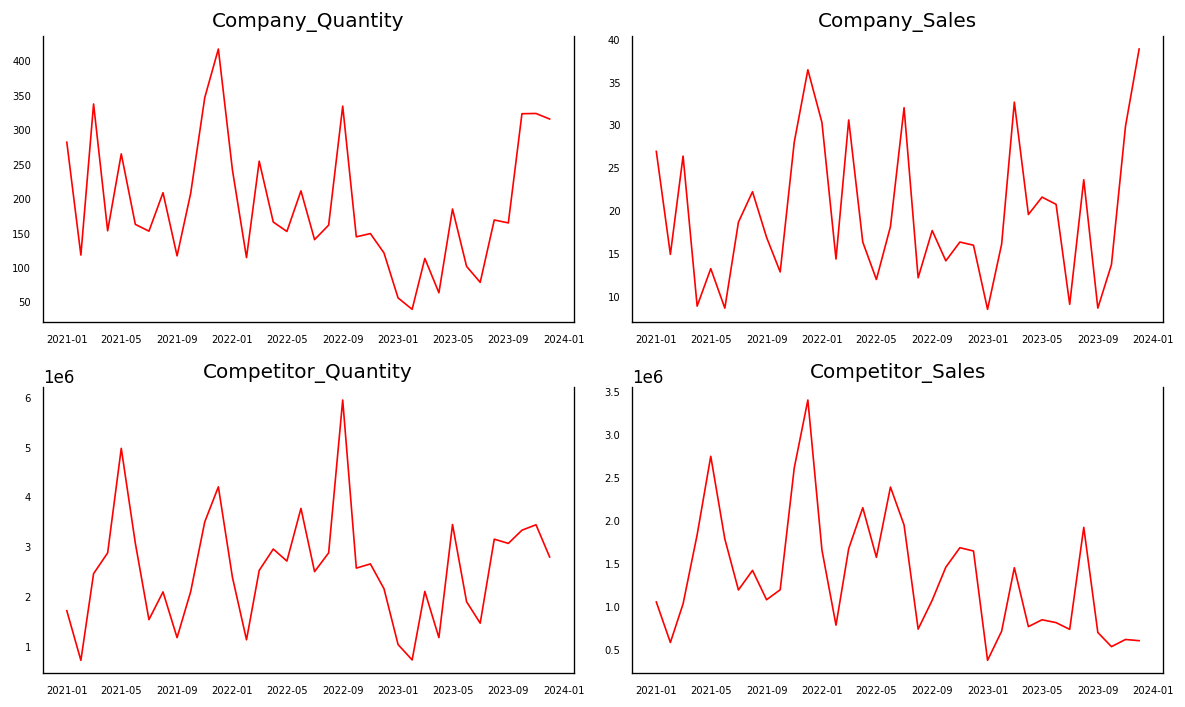

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [5]:
ad_fuller_result_1 = adfuller(macro_data['Competitor_Quantity'].diff()[1:])

print('Compe_Quantity')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['Competitor_Sales'].diff()[1:])

print('Compe_Sales')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_3 = adfuller(macro_data['Company_Quantity'].diff()[1:])

print('Quantity')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')

print('\n---------------------\n')

ad_fuller_result_4 = adfuller(macro_data['Company_Sales'].diff()[1:])

print('Sales')
print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

Compe_Quantity
ADF Statistic: -5.7723864456207234
p-value: 5.355000561717881e-07

---------------------

Compe_Sales
ADF Statistic: -5.183768871825836
p-value: 9.488304510023994e-06

---------------------

Quantity
ADF Statistic: -5.5395061631634945
p-value: 1.7143662242777151e-06

---------------------

Sales
ADF Statistic: -3.3202403509666674
p-value: 0.013997619335187136


In [6]:
print('Company_Sales causes Company_Quantity?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['Company_Quantity', 'Company_Sales']], 8)

print('\nCompany_Quantity causes Company_Sales?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['Company_Sales', 'Company_Quantity']], 8)

print('Competitor_Sales causes Competitor_Quantity?\n')
print('------------------')
granger_3 = grangercausalitytests(macro_data[['Competitor_Quantity', 'Competitor_Sales']], 8)

print('\nCompetitor_Quantity causes Competitor_Sales?\n')
print('------------------')
granger_4 = grangercausalitytests(macro_data[['Competitor_Sales', 'Competitor_Quantity']], 8)


Company_Sales causes Company_Quantity?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2927  , p=0.0464  , df_denom=32, df_num=1
ssr based chi2 test:   chi2=4.6952  , p=0.0302  , df=1
likelihood ratio test: chi2=4.4058  , p=0.0358  , df=1
parameter F test:         F=4.2927  , p=0.0464  , df_denom=32, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5829  , p=0.0928  , df_denom=29, df_num=2
ssr based chi2 test:   chi2=6.0566  , p=0.0484  , df=2
likelihood ratio test: chi2=5.5737  , p=0.0616  , df=2
parameter F test:         F=2.5829  , p=0.0928  , df_denom=29, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0245  , p=0.1351  , df_denom=26, df_num=3
ssr based chi2 test:   chi2=7.7087  , p=0.0524  , df=3
likelihood ratio test: chi2=6.9278  , p=0.0742  , df=3
parameter F test:         F=2.0245  , p=0.1351  , df_denom=26, df_num=3

Granger Causality
number of lags (no zer

In [20]:
# macro_data = macro_data[['Company_Quantity','Company_Sales']]
macro_data = macro_data[['Competitor_Quantity','Competitor_Sales']]
print(macro_data.shape)

KeyError: "['Competitor_Sales'] not in index"

In [8]:
train_df=macro_data[:int(0.8*(len(macro_data)))]
test_df=macro_data[int(0.8*(len(macro_data))):]

In [9]:
print(test_df.shape)

(8, 2)


In [10]:
model = VAR(train_df.diff()[1:])

In [14]:
sorted_order=model.select_order(maxlags=8)
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      35.81*      35.91*  3.577e+15*      35.83*
1       36.04       36.34   4.497e+15       36.09
2       36.25       36.74   5.651e+15       36.33
3       36.64       37.33   8.766e+15       36.75
4       36.85       37.75   1.191e+16       37.00
5       37.12       38.22   1.840e+16       37.31
6       36.97       38.26   2.091e+16       37.19
7       36.76       38.25   2.822e+16       37.01
8       36.25       37.94   4.988e+16       36.53
-------------------------------------------------


In [15]:
var_model = VARMAX(train_df, order=(8,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                        Statespace Model Results                                       
Dep. Variable:     ['Company_Quantity', 'Competitor_Quantity']   No. Observations:                   28
Model:                                                  VAR(8)   Log Likelihood                -578.363
                                                   + intercept   AIC                           1230.726
Date:                                         Mon, 22 Jan 2024   BIC                           1280.018
Time:                                                 15:40:34   HQIC                          1245.795
Sample:                                             01-01-2021                                         
                                                  - 04-01-2023                                         
Covariance Type:                                           opg                                         
Ljung-Box (L1) (Q):             1.77, 0.19   Jarque-Bera (JB):  

In [16]:
n_forecast = 8
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean

In [17]:
predictions.columns=['Company_Quantity_pred','Company_Sales_pred']
predictions

# predictions.columns=['Competitor_Quantity_pred','Competitor_Sales_pred']
# predictions

,Company_Quantity_pred,Company_Sales_pred
2023-05-01,71.294702,2.250136e+06
2023-06-01,190.155752,3.078755e+06
2023-07-01,147.855872,2.649302e+06
2023-08-01,209.143656,2.910341e+06
2023-09-01,211.545793,2.670961e+06
2023-10-01,226.178925,2.207447e+06
2023-11-01,223.757075,2.254914e+06
2023-12-01,250.618928,2.458282e+06


In [18]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<Axes: >

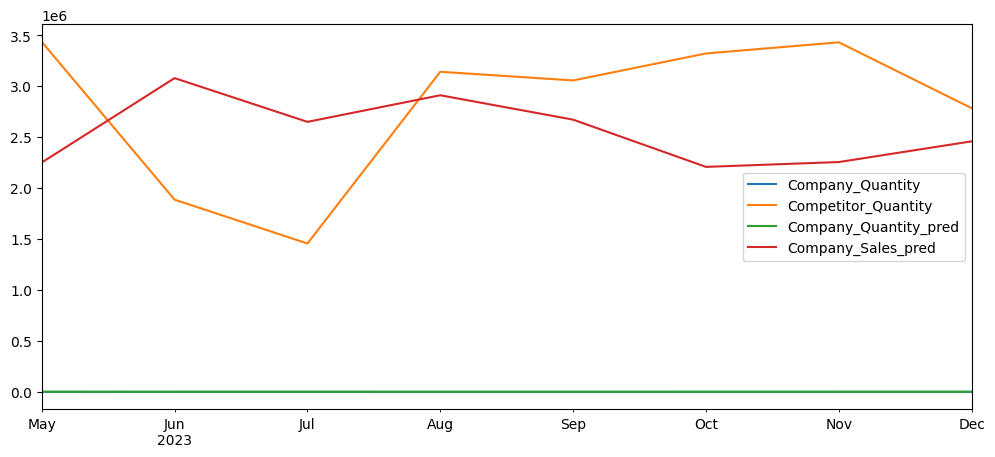

In [19]:
test_vs_pred.plot(figsize=(12,5))

In [77]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

# rmse_quantity=math.sqrt(mean_squared_error(predictions['Company_Quantity_pred'],test_df['Company_Quantity']))
# print('Mean value of Company_Quantity is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Company_Quantity']),rmse_quantity))

# rmse_sales=math.sqrt(mean_squared_error(predictions['Company_Sales_pred'],test_df['Company_Sales']))
# print('Mean value of Company_Sales is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Company_Sales']),rmse_sales))

# For Quantity
rmse_quantity = math.sqrt(mean_squared_error(predictions['Competitor_Quantity_pred'], test_df['Competitor_Quantity']))
print('Mean value of Competitor_Quantity is: {}. Root Mean Squared Error is: {}'.format(mean(test_df['Competitor_Quantity']), rmse_quantity))

# For Sales
rmse_sales = math.sqrt(mean_squared_error(predictions['Competitor_Sales_pred'], test_df['Competitor_Sales']))
print('Mean value of Competitor_Sales is: {}. Root Mean Squared Error is: {}'.format(mean(test_df['Competitor_Sales']), rmse_sales))

KeyError: 'Competitor_Quantity_pred'